## Задание 1

Импортируйте библиотеки pandas и numpy.


In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и Y из этих данных.

In [77]:
from sklearn.datasets import load_boston

In [78]:
boston = load_boston()
data = boston["data"]

In [79]:
feature_names = boston["feature_names"]

X = pd.DataFrame(data, columns=feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [80]:
target = boston["target"]

Y = pd.DataFrame(target, columns=["price"])
Y.head()


,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.



In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)


Масштабируйте данные с помощью StandardScaler.

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [84]:
from sklearn.manifold import TSNE

In [85]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

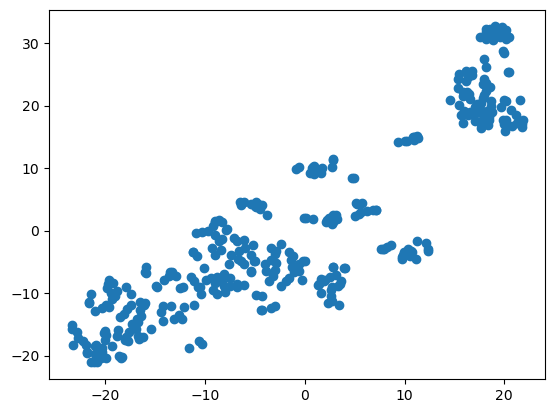

In [86]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

## Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train. Параметр max_iter должен быть равен 100, random_state сделайте равным 42. Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

In [87]:
from sklearn.cluster import KMeans

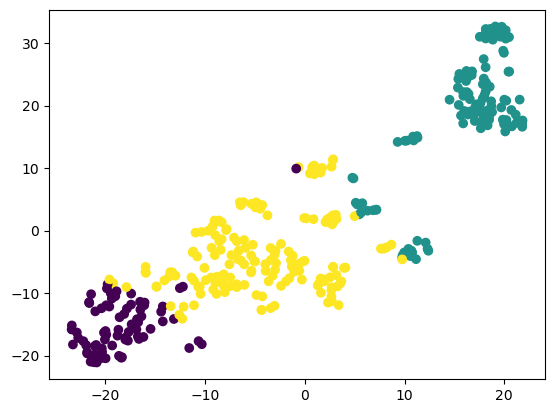

In [88]:
model = KMeans(n_clusters=3, random_state=42, max_iter=100)
labels_train = model.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

Вычислите средние значения price и CRIM в разных кластерах.

In [89]:
print('Средние значения price:')
print('Кластер_0: {}'.format(Y_train[labels_train == 0].mean()))
print('Кластер_1: {}'.format(Y_train[labels_train == 1].mean()))
print('Кластер_2: {}'.format(Y_train[labels_train == 2].mean()))
print('Средние значения CRIM:')
print('Кластер_0: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('Кластер_1: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('Кластер_2: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))

Средние значения price:
Кластер 0: price    28.089189
dtype: float64
Кластер 1: price    16.402632
dtype: float64
Кластер 2: price    25.295783
dtype: float64
Средние значения CRIM:
Кластер 0: 0.07632851351351352
Кластер 1: 10.10463175438597
Кластер 2: 0.4262868674698794
